#Conocer los datasets

In [ ]:
import pandas as pd

In [ ]:
peliculas = pd.read_csv("movies.csv")
peliculas.columns = ['peliculaId','titulo','generos']
peliculas = peliculas.set_index('peliculaId')
peliculas.head()

,titulo,generos
peliculaId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [ ]:
peliculas.describe()

,titulo,generos
count,9742,9742
unique,9737,951
top,Eros (2004),Drama
freq,2,1053


In [ ]:
notas = pd.read_csv('ratings.csv')
notas.columns = ['usuarioId','peliculaId','nota','momento']
notas.head()

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
notas.describe()

,usuarioId,peliculaId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#Primer intento de un sistema de recomendación

In [ ]:
notas.value_counts("peliculaId")

peliculaId
356       329
318       317
296       307
593       279
2571      278
         ... 
57502       1
57522       1
57526       1
4032        1
193609      1
Length: 9724, dtype: int64

In [ ]:
peliculas.loc[356]

titulo          Forrest Gump (1994)
generos    Comedy|Drama|Romance|War
Name: 356, dtype: object

In [ ]:
total_de_votos = notas.value_counts("peliculaId")

In [ ]:
peliculas['total_de_votos'] = total_de_votos
peliculas.sort_values('total_de_votos', ascending=False).head(10)

,titulo,generos,total_de_votos
peliculaId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0
110,Braveheart (1995),Action|Drama|War,237.0
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0


#Segundo intento - considerando las notas

In [ ]:
media_votos = notas.groupby('peliculaId').mean()['nota']
peliculas['media_votos'] = media_votos
peliculas.head()

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,52.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0,2.357143
5,Father of the Bride Part II (1995),Comedy,49.0,3.071429


In [ ]:
peliculas.sort_values('total_de_votos', ascending=False).head(10)

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


In [ ]:
peliculas_con_mas_50_votos = peliculas.query('total_de_votos >=50')
peliculas_con_mas_50_votos.sort_values('media_votos', ascending=False).head(10)

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


#Tercer intento - considerando las películas que el usuario miró

In [ ]:
peliculas_que_mire = [1,19,21,10,2]
peliculas.loc[peliculas_que_mire]

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [ ]:
aventura_infantil_fantasia = peliculas_con_mas_50_votos.query("generos=='Adventure|Children|Fantasy'")
aventura_infantil_fantasia.drop(peliculas_que_mire, errors='ignore').sort_values('media_votos',ascending=False).head(10)

,titulo,generos,total_de_votos,media_votos
peliculaId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


#Calculando las distancias entre usuarios

In [ ]:
#Juan - 5
#Christian - 4 
#Sergio - 3.5

#Juan - Christian = 1
#Christian - Sergio = 0.5


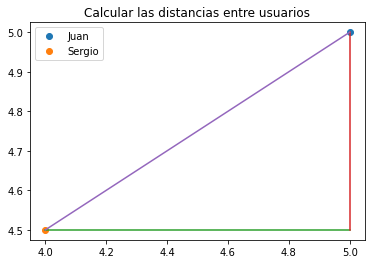

In [ ]:
#Juan = [5,5]
#Sergio - [4,4.5]

import matplotlib.pyplot as plt

plt.plot(5,5,"o")
plt.plot(4,4.5,"o")
plt.legend(['Juan','Sergio'])
plt.title('Calcular las distancias entre usuarios')

plt.plot([4,5],[4.5,4.5],linestyle="-")
plt.plot([5,5],[4.5,5],linestyle="-")
plt.plot([4,5],[4.5,5],linestyle="-")

In [ ]:
import numpy as np

juan = np.array([5,5])
sergio = np.array([4,4.5])

juan - sergio


array([1. , 0.5])

In [ ]:
from math import sqrt 

def pitagoras(a,b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x*delta_x + delta_y*delta_y)


In [ ]:
pitagoras(juan,sergio)

1.118033988749895

In [ ]:
np.linalg.norm(juan-sergio)

1.118033988749895

In [ ]:
from math import sqrt 

def distancia(a,b):
  return np.linalg.norm(a-b)

In [ ]:
distancia(juan,sergio)

1.118033988749895

Text(0.5, 1.0, 'Calcular las distancias entre usuarios')

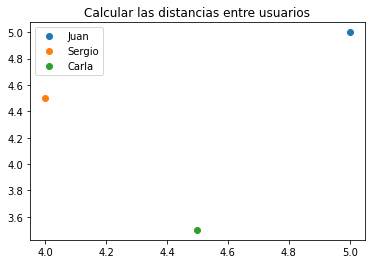

In [ ]:
plt.plot(5,5,"o")
plt.plot(4,4.5,"o")
plt.plot(4.5,3.5,"o")
plt.legend(['Juan','Sergio','Carla'])
plt.title('Calcular las distancias entre usuarios')

In [ ]:
juan = np.array([5,5,4.5])
sergio = np.array([4,4.5,5])
carla = np.array([4.5,3.5,5])

print(distancia(juan,sergio))
print(distancia(sergio,carla))
print(distancia(juan,carla))


1.224744871391589
1.118033988749895
1.6583123951777


#Generalizando el cálculo de distancias

In [ ]:
notas.head()

,usuarioId,peliculaId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
usuario1 = notas.query("usuarioId==1")[['peliculaId','nota']].set_index('peliculaId')
usuario4 = notas.query("usuarioId==4")[['peliculaId','nota']].set_index('peliculaId')

diferencias = usuario1.join(usuario4, lsuffix='_izq', rsuffix='_der').dropna()
distancia(diferencias['nota_izq'],diferencias['nota_der'])



11.135528725660043

In [ ]:
def notas_del_usuario(usuarioId):
  notas_del_usuario = notas.query("usuarioId==%d" % usuarioId )[['peliculaId','nota']]
  notas_del_usuario = notas_del_usuario.set_index('peliculaId')
  return notas_del_usuario




In [ ]:
def diferencia_de_vectores(a,b):
  return np.linalg.norm(a-b)

In [ ]:
def distancia_entre_usuarios(usuario_id1,usuario_id2):
  notas1 = notas_del_usuario(usuario_id1)
  notas2 = notas_del_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix='_izq', rsuffix='_der').dropna()
  return diferencia_de_vectores(diferencias['nota_izq'],diferencias['nota_der'])


In [ ]:
distancia_entre_usuarios(1,6)

8.602325267042627

#Distancia de un usuario de referencia con el resto de usuarios

In [ ]:
len(notas['usuarioId'].unique())

610

In [ ]:
def distancia_entre_usuarios(usuario_id1,usuario_id2):
  notas1 = notas_del_usuario(usuario_id1)
  notas2 = notas_del_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix='_izq', rsuffix='_der').dropna()
  distancia = diferencia_de_vectores(diferencias['nota_izq'],diferencias['nota_der'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(usuario_ref):
  usuarios = notas['usuarioId'].unique()
  distancias = []
  for usuario in usuarios:
    informaciones = distancia_entre_usuarios(usuario_ref, usuario)
    distancias.append(informaciones)
  distancias = pd.DataFrame(distancias, columns=['usuario_ref','usuario','distancia'])
  return distancias
    
  



In [ ]:
distancia_de_todos(1).head(10)

,usuario_ref,usuario,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
5,1,6,8.602325
6,1,7,7.106335
7,1,8,3.741657
8,1,9,1.000000
9,1,10,7.858117


In [ ]:
distancia_de_todos(1).sort_values('distancia').head(20)

,usuario_ref,usuario,distancia
0,1,1,0.000000
577,1,578,0.000000
76,1,77,0.000000
84,1,85,0.000000
174,1,175,0.000000
555,1,556,0.000000
252,1,253,0.000000
290,1,291,0.000000
305,1,306,0.000000
495,1,496,0.000000


#Refinando nuestra funcion de distancia para no considerar usuarios distantes

In [ ]:
notas_del_usuario(1).join(notas_del_usuario(85),lsuffix='_izq', rsuffix='_der').dropna()

,nota_izq,nota_der
peliculaId,,
527,5.0,5.0


In [ ]:
def distancia_entre_usuarios(usuario_id1,usuario_id2,minimo=5):
  notas1 = notas_del_usuario(usuario_id1)
  notas2 = notas_del_usuario(usuario_id2)
  diferencias = notas1.join(notas2, lsuffix='_izq', rsuffix='_der').dropna()
  if len(diferencias) < minimo:
    return [usuario_id1, usuario_id2, 10000]
  distancia = diferencia_de_vectores(diferencias['nota_izq'],diferencias['nota_der'])
  return [usuario_id1, usuario_id2, distancia]

In [ ]:
def distancia_de_todos(usuario_ref):
  usuarios = notas['usuarioId'].unique()
  distancias = []
  for usuario in usuarios:
    informaciones = distancia_entre_usuarios(usuario_ref, usuario)
    distancias.append(informaciones)
  distancias = pd.DataFrame(distancias, columns=['usuario_ref','usuario','distancia'])
  return distancias
    

In [ ]:
distancia_de_todos(1).sort_values('distancia').head(20)

,usuario_ref,usuario,distancia
0,1,1,0.000000
76,1,77,0.000000
510,1,511,0.500000
365,1,366,0.707107
522,1,523,1.000000
48,1,49,1.000000
8,1,9,1.000000
257,1,258,1.000000
318,1,319,1.118034
397,1,398,1.224745
